In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리를 불러옵니다
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

In [4]:
import glob
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [5]:
# 각각의 데이터셋 import 
df_customers = pd.read_csv(path[0])
df_geolocation = pd.read_csv(path[1])
df_orders = pd.read_csv(path[2])
df_items = pd.read_csv(path[3])
df_payments = pd.read_csv(path[4])
df_reviews = pd.read_csv(path[5])
df_products = pd.read_csv(path[6])
df_sellers = pd.read_csv(path[7])
df_category = pd.read_csv(path[8])

In [6]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
df_orders
# 주문건수 99441개 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [8]:
df_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [9]:
# order_id 한개에 (주문 한개에 여러 상품을 주문한게 있어서 (df_orders의 order_id 갯수랑 일치하지 않는 것)
df_items['order_id'].nunique()

98666

In [10]:
df_items['seller_id'].nunique()
# 어쨌든 모든 셀러가 한번씩은 판매경험이 있다는 것을 증명함 

3095

In [11]:
# 셀러는 3095명 
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [12]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [13]:
df = df_orders.merge(df_customers, on = 'customer_id', how = 'left')
df = df.merge(df_items, on  = 'order_id', how = 'outer')
df = df.merge(df_sellers, on = 'seller_id', how = 'outer')
df = df.merge(df_products, on = 'product_id', how = 'outer')
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,...,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113421,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaN,NaN,2017-03-30 00:00:00,78a159045124eb7601951b917a42034f,89111,...,blumenau,SC,automotivo,48.0,260.0,2.0,400.0,16.0,4.0,11.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,...,sao paulo,SP,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0


In [14]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
seller_zip_code_prefix            775
seller_city                       775
seller_state                      775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_leng

In [15]:
# 왜 이렇게 null이 많지?
df[df['order_item_id'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
48292,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,41fc647b8c6bd979b1b6364b60471b50,89288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48293,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,0e634b16e4c585acbd7b2e8276ce6677,11701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48294,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,596ed6d7a35890b3fbac54ec01f69685,2318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48295,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,2349bbb558908e0955e98d47dacb7adb,48607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48296,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,4fa4365000c7090fcb8cad5713c6d3db,1151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49062,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,a33e0969408919ba06779f497ead93ec,7025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49063,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,e90598185d2427a35e32ef241a5c04aa,11075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49064,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,d05c44a138277ad325d915c6b7ccbcdf,5344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49065,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,e72a90a2b29fe1a8795b284aaaa3246f,22723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# df['order_status'] 에서 unavailable , canceled는 제외해야 진정한 셀러의 판매 실적

In [16]:
seller_vaild  = df[~ df['order_status'].str.contains('unavailable') & ~ df['order_status'].str.contains('canceled')]
seller_vaild 
#  112109 rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,...,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,...,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,...,sao paulo,SP,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0


In [17]:
# seller_id null 인거 다시 찾ㅅ기
seller_vaild.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  20
order_delivered_carrier_date      728
order_delivered_customer_date    1920
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       8
product_id                          8
seller_id                           8
shipping_limit_date                 8
price                               8
freight_value                       8
seller_zip_code_prefix              8
seller_city                         8
seller_state                        8
product_category_name            1597
product_name_lenght              1597
product_description_lenght       1597
product_photos_qty               1597
product_weight_g                   26
product_leng

In [18]:
seller_vaild[seller_vaild['seller_id'].isnull()]
# 이 8개 값은... 애초에 셀러 아이디가 등록되지 않았으니까 셀러 실적에 포함할 수 없는 컬럼임..  
# seller_vaild['seller_id'].notnull() 조건으로 다시 서브셋 지정한 데이터셋이 셀러 실적을 볼 수 있을 듯 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
48349,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00,55fbb57fd54c35a38c80c2a032a6ca6e,15300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48366,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00,2e015e68fbfa36910263df5384e8e45c,73401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48459,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00,355862aa14375fe3950ee04fef9c7a53,22621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48471,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaN,2016-12-01 00:00:00,f15a952dfc52308d0361288fbf42c7b3,91250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48721,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00,10d5890ed5e7ec78a7db23b5ac579b17,93025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48740,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaN,NaN,2016-11-25 00:00:00,6a2da481aa7827b951175772a0fe8bb8,16012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48745,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00,161e5b2b4513edb336986a8909218365,87720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48830,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,NaN,NaN,2016-11-29 00:00:00,8886115442775dd8a20c2dcc921c7cc8,88070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
real_s_valid = seller_vaild[seller_vaild['seller_id'].notnull()]
real_s_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,...,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,...,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,...,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,...,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,...,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,...,sao paulo,SP,moveis_decoracao,19.0,531.0,1.0,5900.0,41.0,21.0,41.0


In [20]:
real_s_valid.isnull().sum()
# 셀러와 관련한 항목 null 없으니까 이걸로 ㄱㄱ 

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      721
order_delivered_customer_date    1912
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1589
product_name_lenght              1589
product_description_lenght       1589
product_photos_qty               1589
product_weight_g                   18
product_leng

In [21]:
pd.set_option('display.max_columns', None)

In [22]:
real_s_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05

In [23]:
# 상품 무게나 이런거 필요 없으니까 슬라이싱으로 보고싶은 컬럼 범위지정 
real_s_valid.iloc[ : , :22]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,delivered,2018-05-22 21:13:21,2018-05-22 21:35:40,2018-05-24 12:28:00,2018-06-12 23:11:29,2018-06-08 00:00:00,e55e436481078787e32349cee9febf5e,39803,teofilo otoni,MG,1.0,6e1c2008dea1929b9b6c27fa01381e90,edf3fabebcc20f7463cc9c53da932ea8,2018-05-28 21:31:24,219.90,24.12,8320.0,sao paulo,SP,moveis_decoracao


In [24]:
real_s_valid['order_id'].nunique()

98199

In [25]:
real_s_valid['customer_id'].nunique()

98199

In [26]:
# 그렇다면 셀러별로 판매 빈도수 측정해보기 
real_s_valid['seller_id'].value_counts().head(120)
# 2025명의 고객에게 판매한 셀러가 1등 

6560211a19b47992c3666cc44a7e94c0    2025
4a3ca9315b744ce9f8e9374361493884    1985
1f50f920176fa81dab994f9023523100    1930
cc419e0650a3c5ba77189a1882b7556a    1766
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
cfb1a033743668a192316f3c6d1d2671     183
d98eec89afa3380e14463da2aabaea72     183
5a8e7d5003a1f221f9e1d6e411de7c23     180
522620dcb18a6b31cd7bdf73665113a9     180
de23c3b98a88888289c6f5cc1209054a     180
Name: seller_id, Length: 120, dtype: int64

In [27]:
# 구매금액계산
# TotalPrice 는 RFM 중 MonetaryValue

In [28]:
real_s_valid['order_item_id'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., 11., 10.,  7.,  8.,  9., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [29]:
real_s_valid[real_s_valid['product_id'].str.contains('710e8b076db06c8e5343a9e23f0e3d83')]
# order_item_id 는 주문 한개당 구매한 상품 번호임 
# 하단 예시는 주문 하나에 상품을 두개 구매했다는거임. 중복값이 아니라는것을 암시하는 컬럼 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
113416,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,1.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0


In [30]:
# 어차피 구매 수량은 'order_item_id	'별 1개씩이니까 새 컬럼 만들어서 1 값으로 싹 통일
real_s_valid['Quantity'] = 1
real_s_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,2017-08-10 13:35:55,2017-08-10 13:50:09,2017-08-11 13:52:35,2017-08-16 19:03:36,2017-08-23 00:00:00,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,1.0,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 13:50:09,75.90,7.79,9350.0,maua,SP,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113417,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,delivered,2018-08-10 21:14:35,2018-08-10 21:25:22,2018-08-13 13:54:00,2018-08-21 04:16:31,2018-08-30 00:00:00,0b39f417a3c099ff0497346258e8d752,39810,carai,MG,2.0,710e8b076db06c8e5343a9e23f0e3d83,8dd386be0767c330276ea6a3f96532d3,2018-08-15 21:25:22,44.99,22.25,88490.0,paulo lopes,SC,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0,1
113420,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1.0,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,13660.0,porto ferreira,SP,construcao_ferramentas_iluminacao,40.0,516.0,2.0,750.0,30.0,28.0,28.0,1
113422,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,delivered,2018-07-24 09:46:27,2018-07-24 11:24:27,2018-07-24 15:14:00,2018-08-02 22:47:35,2018-08-16 00:00:00,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,60455,fortaleza,CE,1.0,1d187e8e7a30417fda31e85679d96f0f,d263fa444c1504a75cbca5cc465f592a,2018-07-30 11:24:27,399.00,45.07,13478.0,americana,SP,moveis_decoracao,43.0,729.0,2.0,2100.0,80.0,8.0,30.0,1
113423,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11

In [31]:
real_s_valid['totalprice'] = real_s_valid['Quantity'] * real_s_valid['price']

In [32]:
real_s_valid['totalprice'].describe()
# 평균 120헤알 
# 최댓값이 6735..?

count    112101.000000
mean        120.377166
std         182.637401
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: totalprice, dtype: float64

In [33]:
real_s_valid[real_s_valid['totalprice'] > 6700]
# 진짜 있긴 있네... 뭐냐 저거 .... 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Quantity,totalprice
111068,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1.0,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,1,6735.0
111631,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,459bef486812aa25204be022145caa62,29066,vitoria,ES,1.0,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,1,6729.0


### 중복데이터 제거 

In [34]:
print(real_s_valid.shape)
copy = real_s_valid.drop_duplicates().copy()
copy.shape
# 중복치 없당

(112101, 31)


(112101, 31)

# RFM 계산

In [35]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112101 entries, 0 to 113424
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112101 non-null  object 
 1   customer_id                    112101 non-null  object 
 2   order_status                   112101 non-null  object 
 3   order_purchase_timestamp       112101 non-null  object 
 4   order_approved_at              112086 non-null  object 
 5   order_delivered_carrier_date   111380 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  112101 non-null  object 
 8   customer_unique_id             112101 non-null  object 
 9   customer_zip_code_prefix       112101 non-null  int64  
 10  customer_city                  112101 non-null  object 
 11  customer_state                 112101 non-null  object 
 12  order_item_id                 

In [36]:
copy.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'Quantity', 'totalprice'],
      dtype='object')

In [37]:
# order_purchase_timestamp -> 고객의 구매 일자이면서 셀러의 판매일자 
copy['order_purchase_timestamp'] = pd.to_datetime(copy['order_purchase_timestamp'])

In [38]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정) 
last_timestamp = copy['order_purchase_timestamp'].max() + dt.timedelta(days = 1)
last_timestamp

Timestamp('2018-09-04 09:06:57')

### 셀러별 Recency, Frequency, Monetary 값 구하기

In [39]:
# RFM 값을 정의합니다.
# Recency : 최근 거래 기준일(last_timestamp)과 셀러별 최근 판매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액

In [40]:
rfm = copy.groupby(['seller_id']).agg({'order_purchase_timestamp' : lambda x : (last_timestamp - x.max()).days,
                                                 'order_id' : 'count',
                                                'totalprice' : 'sum'})
rfm.shape

(3053, 3)

In [41]:
rfm
# 얼마나 자주 얼마나 많은양  얼마나 비싼걸 판매했는지 ~ 
# 셀러의 판매행태를 추측할 수 있음 

,order_purchase_timestamp,order_id,totalprice
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50
003554e2dce176b5555353e4f3555ac8,263,1,120.00
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,17,31,1649.01
ffdd9f82b9a447f6f8d4b91554cc7dd3,15,20,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,113,14,1839.86


In [42]:
rfm.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'order_id' : 'Frequency', 
                      'totalprice': 'MonetaryValue'},
            inplace = True)
rfm

,Recency,Frequency,MonetaryValue
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50
003554e2dce176b5555353e4f3555ac8,263,1,120.00
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,17,31,1649.01
ffdd9f82b9a447f6f8d4b91554cc7dd3,15,20,2101.20
ffeee66ac5d5a62fe688b9d26f83f534,113,14,1839.86


In [43]:
rfm['Frequency'].unique()

array([   3,  239,   55,    1,  170,   26,  172,  135,    2,    5,   15,
         12,   39,   11,   67,  131,  246,    8,    4,   17,   16,   24,
         30,   44,    6,    9,   13,   94,   88,   51,   28,   98,   22,
         66,   64,   10,   63,   62,   60,   72,   74,   53,  405,   18,
         95,   37,    7,  130,   83,   23,   97,   21,   27,   19,   20,
         56,   14,   25,   78,  210,  146,   31,  177,   73,  220,   40,
         58,  137,  193,  269,   32,   43,   35, 1428,  128,   48,  102,
        560,  134,   85,   38,  410,   36,  149,  129,  266,   61,  558,
         34,  529,  178,  117,   33,  171,   49,  327,  140,   75,   29,
       1930,   79,   54,  425,  194,  148,   80,   46,   52,  166,  165,
         50,  116,   47,  110,  126,   82,  174,   45,  212,   87,   42,
         41,  161,  240,  281,  613,  121,   99,  160, 1143,  101,  229,
        132,  125,  111,  153,   59,  539,   90,  216,  151, 1155, 1985,
        222,  346,  394,   89,  454,   68,   84,  1

In [44]:
rfm.describe()
# min 최근 구매한 사람. 
# mean 빈도

,Recency,Frequency,MonetaryValue
count,3053.000000,3053.000000,3053.000000
mean,140.872257,36.718310,4420.046099
std,167.448257,119.706012,13963.226311
min,1.000000,1.000000,3.500000
25%,18.000000,2.000000,210.000000
50%,51.000000,8.000000,825.000000
75%,222.000000,25.000000,3353.480000
max,700.000000,2025.000000,229237.630000


# RFM 모형
* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
* Q CUT으로 진행 : pd.qcut

In [45]:
list(range(1, 6))

[1, 2, 3, 4, 5]

In [46]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [47]:
# Recency 는 최근일수록 높은 점수
# Frequency, MonetaryValue 는 값이 클 수록 높은 점수
r_scores = list(range(5, 0, -1))
f_scores = list(range(1, 6))
m_scores = list(range(1, 6))
cut_size = 5

In [48]:
rfm.sample(3)

,Recency,Frequency,MonetaryValue
seller_id,,,
d594982fd877af63ace38ea1fca27c76,13,7,217.04
f0837c8d71434931d9e38e7b79234797,20,23,3446.90
fa7ad8ae9bcb2c4493fdf38e96b1d74f,295,2,88.00


In [49]:
r_cut = pd.qcut(rfm['Recency'], q=cut_size, labels = r_scores)
f_cut = pd.qcut(rfm['Frequency'], q=cut_size, labels = f_scores)
m_cut = pd.qcut(rfm['MonetaryValue'], q=cut_size, labels = m_scores)
# assign 메소드로 여러변수 한번에 만들기 
rfm = rfm.assign(R = r_cut, F = f_cut,  M =  m_cut)

In [50]:
rfm.sample(3)

,Recency,Frequency,MonetaryValue,R,F,M
seller_id,,,,,,
4371b634e0efc0e22b09b52907d9d469,21,111,8168.00,4,5,5
6bb62a4912377c7bfe7cb17b406bc7e6,21,6,739.52,4,3,3
0873d9f8f36123f8d910f4760e788cfb,20,6,7265.59,4,3,5


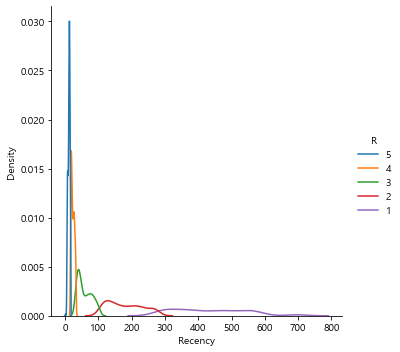

In [51]:
sns.displot(data=rfm, x="Recency", hue="R", kind="kde")

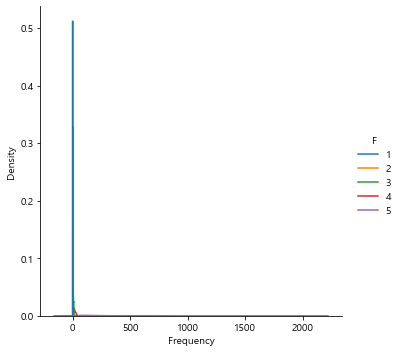

In [52]:
sns.displot(data=rfm, x="Frequency", hue="F", kind="kde")

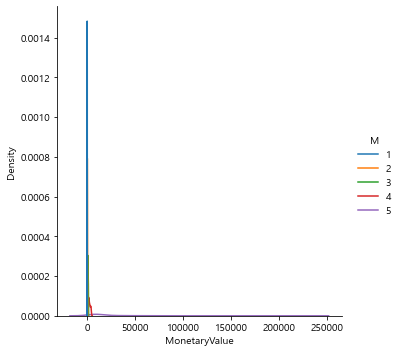

In [53]:
sns.displot(data=rfm, x="MonetaryValue", hue="M", kind="kde")

## RFM Segment 

In [54]:
# RFM_segment 값을 구해보자 
# R, F, M 값을 문자 그대로 붙여서 세그먼트를 구분
rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
seller_id,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355


## RFM Score

In [55]:
# R, F, M 값의 합계를 구해서 세그먼트 점수 구하깅
rfm["RFM_score"]  = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
seller_id,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124,7
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13


<AxesSubplot:xlabel='RFM_segment', ylabel='RFM_score'>

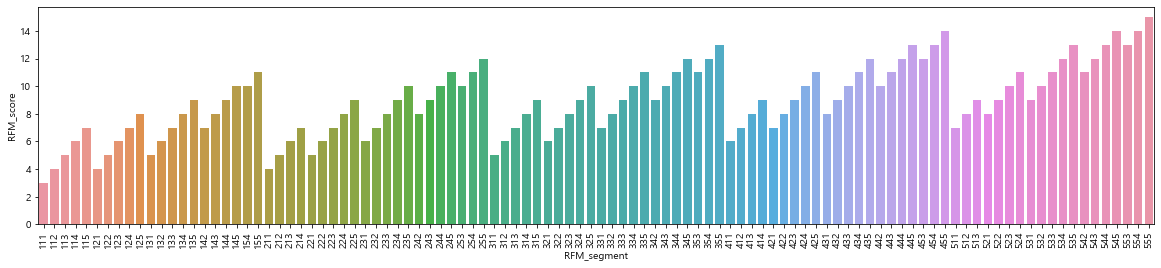

In [56]:
# RFM segment 값에 따라 정렬합니다.
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")

In [57]:
score_rfm = rfm.groupby(["RFM_score"]).agg({"Recency" : "mean", 
                                "Frequency" : "mean", 
                                "MonetaryValue" : ["sum", "mean"]})
score_rfm.style.background_gradient().format("{:,.0f}")

In [58]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 셀러등급 지정
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], q=3, labels=["silver", "gold", "platinum"])
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,321,3,2685.00,1,2,4,124,7,silver
001cca7ae9ae17fb1caed9dfb1094831,53,239,25080.03,3,5,5,355,13,platinum
002100f778ceb8431b7a1020ff7ab48f,144,55,1234.50,2,5,3,253,10,gold
003554e2dce176b5555353e4f3555ac8,263,1,120.00,2,1,1,211,4,silver
004c9cd9d87a3c30c522c48c4fc07416,123,170,19712.71,2,5,5,255,12,platinum


In [59]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe 값을 구합니다.
rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
silver,1189.0,5.119428,1.386273,3.0,4.0,5.0,6.0,7.0
gold,991.0,9.487386,1.121684,8.0,8.0,9.0,10.0,11.0
platinum,873.0,13.460481,1.148836,12.0,12.0,13.0,15.0,15.0


<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

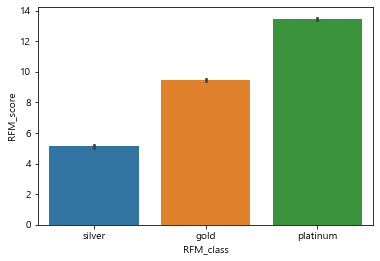

In [60]:
# barplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

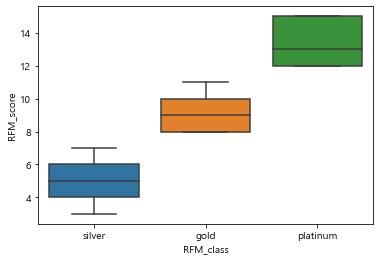

In [61]:
# boxplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot:xlabel='R', ylabel='RFM_score'>

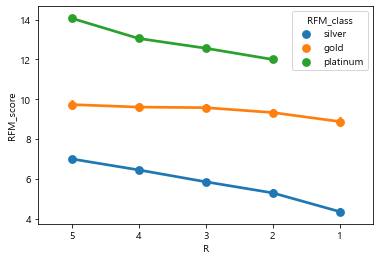

In [62]:
sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")

<AxesSubplot:xlabel='M', ylabel='RFM_score'>

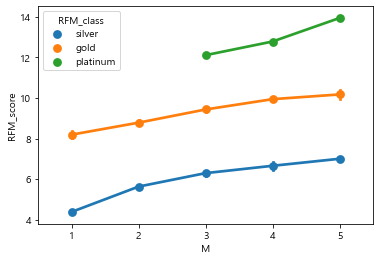

In [63]:
sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")

In [64]:
# "RFM_class" 별로 그룹화합니다.
# "Recency", "Frequency" 의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.
rfm_agg = rfm.groupby("RFM_class").agg({"Recency": "mean", 
                              "Frequency": "mean",
                             "MonetaryValue": ["mean", "sum", "count" ]})

In [65]:
rfm_agg.style.background_gradient()

In [82]:
rfm[rfm['RFM_class'].str.contains('platinum')].sort_values('MonetaryValue', ascending = False)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
seller_id,,,,,,,,,
4869f7a5dfa277a7dca6462dcf3b52b2,10,1155,229237.63,5,5,5,555,15,platinum
53243585a1d6dc2643021fd1853d8905,13,410,222776.05,5,5,5,555,15,platinum
4a3ca9315b744ce9f8e9374361493884,7,1985,200326.12,5,5,5,555,15,platinum
fa1c13f2614d7b5c4749cbc52fecda94,5,585,192842.13,5,5,5,555,15,platinum
7c67e1448b00f6e969d365cea6b010ab,27,1364,187923.89,4,5,5,455,14,platinum
...,...,...,...,...,...,...,...,...,...
a2deecd5398f5df4987110c80a1972a3,10,14,658.53,5,4,3,543,12,platinum
cd3d09fbe6e3e9ff0c0ac0c300e93ae7,16,12,651.04,5,4,3,543,12,platinum
768a86e36ad6aae3d03ee3c6433d61df,11,17,587.46,5,4,3,543,12,platinum


In [66]:
rfm_agg.astype(int).style.format("{:,}")

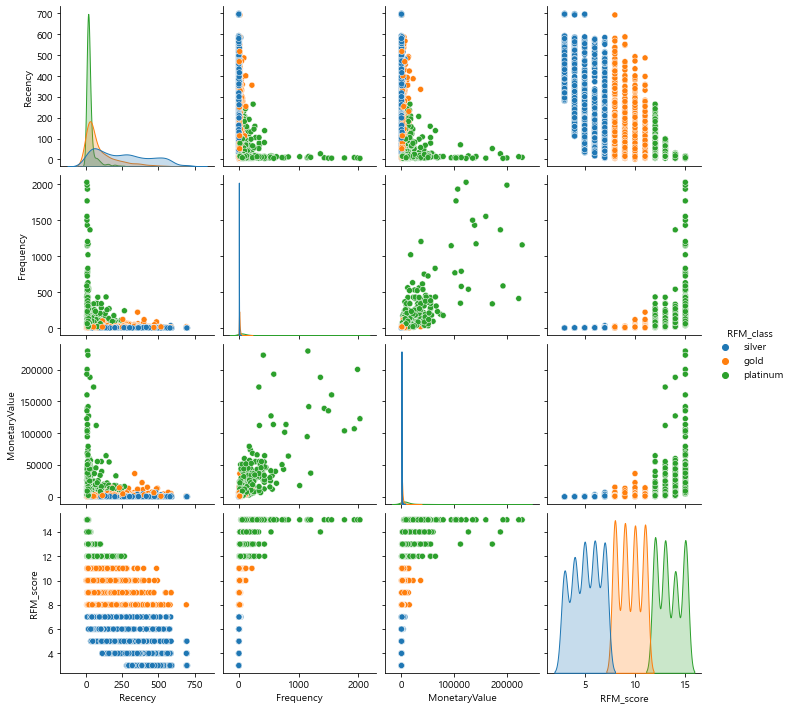

In [67]:
sns.pairplot(rfm, hue = "RFM_class" )

In [68]:
corr = rfm.corr()
corr

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.174595,-0.165596,-0.644770
Frequency,-0.174595,1.000000,0.796501,0.390004
MonetaryValue,-0.165596,0.796501,1.000000,0.386555
RFM_score,-0.644770,0.390004,0.386555,1.000000


<AxesSubplot:>

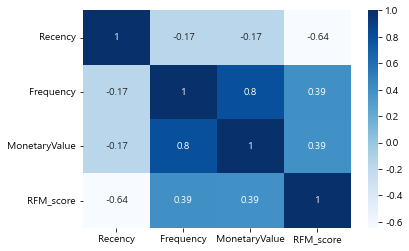

In [69]:
sns.heatmap(corr, 
            cmap = "Blues", 
            annot = True)

In [70]:
np.ones_like(corr)
mask = np.triu(np.ones_like(corr)) #마스킹 할 부분은 대각선 위에 부분이라는 명령어 
mask

array([[1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

<AxesSubplot:>

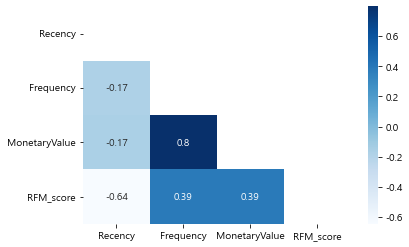

In [71]:
sns.heatmap(corr, cmap = "Blues", 
            annot = True, 
            mask = mask)

# TOP Seller들은 무엇을 파는가

In [72]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112101 entries, 0 to 113424
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112101 non-null  object        
 1   customer_id                    112101 non-null  object        
 2   order_status                   112101 non-null  object        
 3   order_purchase_timestamp       112101 non-null  datetime64[ns]
 4   order_approved_at              112086 non-null  object        
 5   order_delivered_carrier_date   111380 non-null  object        
 6   order_delivered_customer_date  110189 non-null  object        
 7   order_estimated_delivery_date  112101 non-null  object        
 8   customer_unique_id             112101 non-null  object        
 9   customer_zip_code_prefix       112101 non-null  int64         
 10  customer_city                  112101 non-null  object        
 11  

In [73]:
# 셀러 판매정보만 가져오기 
t_s = copy[['seller_id', 'product_category_name', 'Quantity', 'totalprice']]
t_s

,seller_id,product_category_name,Quantity,totalprice
0,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,1,29.99
1,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,1,29.99
2,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,1,29.99
3,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,1,29.99
4,3504c0cb71d7fa48d967e0e4c94d59d9,bebes,1,75.90
...,...,...,...,...
113417,8dd386be0767c330276ea6a3f96532d3,esporte_lazer,1,44.99
113420,babcc0ab201e4c60188427cae51a5b8b,construcao_ferramentas_iluminacao,1,79.00
113422,d263fa444c1504a75cbca5cc465f592a,moveis_decoracao,1,399.00
113423,edf3fabebcc20f7463cc9c53da932ea8,moveis_decoracao,1,219.90


In [74]:
t_s.groupby('seller_id')['Quantity'].sum().sort_values(ascending = False)

seller_id
6560211a19b47992c3666cc44a7e94c0    2025
4a3ca9315b744ce9f8e9374361493884    1985
1f50f920176fa81dab994f9023523100    1930
cc419e0650a3c5ba77189a1882b7556a    1766
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
6c6cc59a5c00cacc5054ca06d65cc282       1
dde698c6d0bd24834c586e5111c2bba7       1
dda37071807e404c5bb2a1590c66326f       1
dd9661d3cda1e6feb237f0c4d8b26f2e       1
da4d149c0ddbac90557103ac0a0ec356       1
Name: Quantity, Length: 3053, dtype: int64

In [75]:
t_s[t_s['seller_id'].str.contains('6560211a19b47992c3666cc44a7e94c0')]

,seller_id,product_category_name,Quantity,totalprice
23416,6560211a19b47992c3666cc44a7e94c0,relogios_presentes,1,93.0
23417,6560211a19b47992c3666cc44a7e94c0,relogios_presentes,1,93.0
23418,6560211a19b47992c3666cc44a7e94c0,relogios_presentes,1,95.0
23419,6560211a19b47992c3666cc44a7e94c0,relogios_presentes,1,95.0
23420,6560211a19b47992c3666cc44a7e94c0,relogios_presentes,1,95.0
...,...,...,...,...
25444,6560211a19b47992c3666cc44a7e94c0,fashion_bolsas_e_acessorios,1,79.0
25445,6560211a19b47992c3666cc44a7e94c0,fashion_bolsas_e_acessorios,1,79.0
25446,6560211a19b47992c3666cc44a7e94c0,fashion_bolsas_e_acessorios,1,19.0
25447,6560211a19b47992c3666cc44a7e94c0,relogios_presentes,1,159.0


In [76]:
t_s[t_s['seller_id'].str.contains('6560211a19b47992c3666cc44a7e94c0')]['product_category_name'].unique()

array(['relogios_presentes', 'fashion_bolsas_e_acessorios', 'audio',
       'esporte_lazer', 'informatica_acessorios', 'perfumaria',
       'construcao_ferramentas_seguranca'], dtype=object)